In [2]:
# positive negative distinction
# positive negative data balance
# choose algo
# train model on processed dataset

### Imports

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

#### Load Data

In [4]:
# load un-analyzed data here from csv --- incomplete
unanalyzed_data = pd.read_csv('C:/Users/KIIT/Documents/minor/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

#### Subjectivity and Polarity determination function from TextBlob

In [5]:
# subjectivity is how much of a personal opinion it is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [6]:
# polarity is how positive or negative it is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#### Add subjectivity and polarity to the dataframe

In [7]:
# create two new columns in the dataset --- incomplete
unanalyzed_data['Subjectivity'] = unanalyzed_data['reviews.text'].apply(getSubjectivity)
unanalyzed_data['Polarity'] = unanalyzed_data['reviews.text'].apply(getPolarity)
unanalyzed_data.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Subjectivity,Polarity
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,0.348718,-0.108974
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,0.844444,0.277778
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,0.525000,0.165625
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,0.544528,0.240497
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,0.568750,0.468750


#### Function to determine sentiment based on polarity

In [8]:
def getSentiment(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#### Add sentiment to the dataframe

In [9]:
# create a new sentiment column in the dataset --- incomplete
unanalyzed_data['Sentiment'] = unanalyzed_data['Polarity'].apply(getSentiment)

# after this, our dataset is analyzed and ready to be used for training

In [10]:
# make a copy of the dataset calling it analyzed_data
# analyzed_data = unanalyzed_data.copy()

# ---------- above code line should be executed only ----------

# ---------- below code lines are just bringing the directly analyzed data using readcsv for further use ----------

# load analyzed data here from csv
analyzed_data = pd.read_csv('analyzed_data_textblob3.csv')

In [11]:
# changing the review_analysis column name to sentiment
analyzed_data.rename(columns={'review_analysis':'Sentiment'}, inplace=True)

# changing the polarity column name to Polarity and subjectivity column name to Subjectivity
analyzed_data.rename(columns={'polarity':'Polarity'}, inplace=True)
analyzed_data.rename(columns={'subjectivity':'Subjectivity'}, inplace=True)

# show the first 5 rows of the dataset
analyzed_data.head(5)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Subjectivity,Polarity,Sentiment
0,0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",0.358333,-0.450000,Negative
1,1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",0.383333,-0.333333,Negative
2,2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",1.000000,0.800000,Positive
3,3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",0.500000,0.500000,Positive
4,4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",0.423333,0.245000,Positive


In [12]:
# printing details of the dataset
print('The shape of the dataset is: ', analyzed_data.shape)
print('The columns of the dataset are: ', analyzed_data.columns)

The shape of the dataset is:  (28332, 28)
The columns of the dataset are:  Index(['Unnamed: 0', 'id', 'dateAdded', 'dateUpdated', 'name', 'asins',
       'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys',
       'manufacturer', 'manufacturerNumber', 'reviews.date',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'Subjectivity', 'Polarity',
       'Sentiment'],
      dtype='object')


#### Preparing a small sample of data for training and testing

In [13]:
# get the number of positive, negative and neutral reviews
analyzed_data['Sentiment'].value_counts()

Positive    23805
Neutral      2402
Negative     2125
Name: Sentiment, dtype: int64

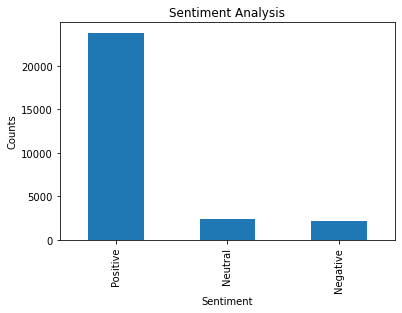

In [14]:
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
analyzed_data['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [15]:
# extracting 500 positive, negative and neutral reviews for training sample
sample_train_positive = analyzed_data[analyzed_data.Sentiment == 'Positive'].iloc[:500]
sample_train_negative = analyzed_data[analyzed_data.Sentiment == 'Negative'].iloc[:500]
sample_train_neutral = analyzed_data[analyzed_data.Sentiment == 'Neutral'].iloc[:500]

In [16]:
# extracting 200 positive, negative and neutral reviews for testing sample
sample_test_positive = analyzed_data[analyzed_data.Sentiment == 'Positive'].iloc[500:700]
sample_test_negative = analyzed_data[analyzed_data.Sentiment == 'Negative'].iloc[500:700]
sample_test_neutral = analyzed_data[analyzed_data.Sentiment == 'Neutral'].iloc[500:700]

In [17]:
# combining the training samples and shuffling them
training_sample = pd.concat([sample_train_positive, sample_train_negative, sample_train_neutral]).sample(frac=1).reset_index(drop=True)

# .concat() combines the datasets
# .sample(frac=1) shuffles the dataset
# .reset_index(drop=True) resets the index of the dataset

In [18]:
# combining the testing samples and shuffling them
testing_sample = pd.concat([sample_test_positive, sample_test_negative, sample_test_neutral]).sample(frac=1).reset_index(drop=True)

In [19]:
# selecting the needed columns for training and testing samples
# review text , polarity, sentiment

# training sample
training_sample = training_sample[['reviews.text', 'Polarity', 'Sentiment']]

# testing sample
testing_sample = testing_sample[['reviews.text', 'Polarity', 'Sentiment']]

In [20]:
# Splitting the training sample into X_train and y_train
X_train = training_sample['reviews.text']
y_train = training_sample['Sentiment']

# Splitting the testing sample into X_test and y_test
X_test = testing_sample['reviews.text']
y_test = testing_sample['Sentiment']

#### Importing the required libraries for training and testing

In [21]:
# we will perform Naive Bayes, SVM, Random Forest and Logistic Regression on the dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Vectorizing the data

TfidfVectorizer is a class from the sklearn.feature_extraction.text module in Python that is used for text feature extraction. It converts a collection of raw text documents into a matrix of TF-IDF features.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which is a numerical statistic that reflects how important a word is to a document in a collection or corpus. The TF-IDF value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus. This helps to adjust for the fact that some words appear more frequently in general and therefore may not be as informative as words that appear less frequently but are specific to the document.

The process of using TfidfVectorizer involves the following steps:

Creating an instance of TfidfVectorizer. By default, this class applies text preprocessing, tokenization, and stop word removal before generating the TF-IDF features.

Calling the fit_transform() method on the training data (X_train), which fits the vectorizer on the training data and transforms the training data into a matrix of TF-IDF features. The result is assigned to X_train.

Calling the transform() method on the test data (X_test), which applies the fitted vectorizer on the test data and transforms it into a matrix of TF-IDF features. The result is assigned to X_test.

The resulting X_train and X_test matrices are sparse matrices, where each row corresponds to a document and each column corresponds to a word in the vocabulary. The value in each cell represents the TF-IDF score of the word in that document.

The purpose of using TfidfVectorizer is to convert the text data into a numerical representation that can be used as input to machine learning models. By representing the text data as TF-IDF features, we can capture the important information about the text while ignoring less informative words. This can improve the accuracy of the machine learning models that use this representation as input.

In [22]:
# vectorizing the training and testing samples
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

#### Naive Bayes Classifier

In [27]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
print('Naive Bayes Accuracy: ', accuracy_score(y_test, pred_nb))
print('Naive Bayes Classification Report: ', classification_report(y_test, pred_nb))
print('Naive Bayes Confusion Matrix: ', confusion_matrix(y_test, pred_nb))

Naive Bayes Accuracy:  0.6966666666666667
Naive Bayes Classification Report:                precision    recall  f1-score   support

    Negative       0.63      0.79      0.70       200
     Neutral       0.93      0.56      0.70       200
    Positive       0.65      0.75      0.69       200

    accuracy                           0.70       600
   macro avg       0.74      0.70      0.70       600
weighted avg       0.74      0.70      0.70       600

Naive Bayes Confusion Matrix:  [[157   6  37]
 [ 44 111  45]
 [ 48   2 150]]


#### Support Vector Machine

In [24]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print('SVM Accuracy: ', accuracy_score(y_test, pred_svm))
print('SVM Classification Report: ', classification_report(y_test, pred_svm))
print('SVM Confusion Matrix: ', confusion_matrix(y_test, pred_svm))

SVM Accuracy:  0.695
SVM Classification Report:                precision    recall  f1-score   support

    Negative       0.68      0.56      0.62       200
     Neutral       0.67      0.86      0.75       200
    Positive       0.74      0.66      0.70       200

    accuracy                           0.69       600
   macro avg       0.70      0.69      0.69       600
weighted avg       0.70      0.69      0.69       600

SVM Confusion Matrix:  [[113  56  31]
 [ 13 173  14]
 [ 39  30 131]]


#### Random Forest Classifier

In [25]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print('Random Forest Accuracy: ', accuracy_score(y_test, pred_rf))
print('Random Forest Classification Report: ', classification_report(y_test, pred_rf))
print('Random Forest Confusion Matrix: ', confusion_matrix(y_test, pred_rf))

Random Forest Accuracy:  0.7116666666666667
Random Forest Classification Report:                precision    recall  f1-score   support

    Negative       0.67      0.63      0.65       200
     Neutral       0.73      0.85      0.79       200
    Positive       0.73      0.65      0.69       200

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600

Random Forest Confusion Matrix:  [[126  39  35]
 [ 16 171  13]
 [ 46  24 130]]


#### Logistic Regression

In [26]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print('Logistic Regression Accuracy: ', accuracy_score(y_test, pred_lr))
print('Logistic Regression Classification Report: ', classification_report(y_test, pred_lr))
print('Logistic Regression Confusion Matrix: ', confusion_matrix(y_test, pred_lr))

Logistic Regression Accuracy:  0.775
Logistic Regression Classification Report:                precision    recall  f1-score   support

    Negative       0.78      0.69      0.73       200
     Neutral       0.74      0.92      0.82       200
    Positive       0.83      0.71      0.77       200

    accuracy                           0.78       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.78      0.77       600

Logistic Regression Confusion Matrix:  [[138  40  22]
 [  8 184   8]
 [ 32  25 143]]
